# 1. Overview

The notebook should include a summary at the beginning that briefly and accurately describes your process. The summary should be approximately 250 words -- about the size of a research paper abstract.

Summary elements:

  -  Business and data understanding: what kind of data are you using, and what makes it well-suited for the business problem?
       - You do not need to include any data visualizations in your summary, but consider including relevant descriptive statistics
  -  Data preparation: why did you choose the data preparation steps that you did, and what was the result?
       - This should be specific to the kind of data you are working with. For example, if you are doing an NLP project, what did you decide to do with stopwords?
       - Be sure to list the packages/libraries used to prepare the data, and why
  -  Modeling: what modeling package(s) did you use, which model(s) within the package(s), and what tuning steps did you take?
       - For some projects there may be only one applicable package; you should still briefly explain why this was the appropriate choice
  -  Evaluation: how well did your final model perform?
       - Include one or more relevant metrics
       - Be sure to briefly describe your validation approach


# 2. Business Understanding

We are a third-party consulting firm specializing in analyzing public sentiment toward technological products for companies seeking to optimize their marketing strategies and product management. Companies approach us to understand which features of their technological products are most appreciated by the general public. This insight allows these companies to fine-tune their marketing campaigns and adjust their product development strategies to align with consumer preferences, ultimately driving higher customer satisfaction and business success.

Our core offering revolves around leveraging advanced machine learning and artificial intelligence models to analyze user-generated content, specifically tweets, that discuss various technological products. By utilizing these models, we are able to detect and classify the sentiment behind each tweet—whether it is positive or non-positive. This sentiment analysis is crucial in helping our clients understand how their products are perceived in the market.

The process begins by collecting and preprocessing large volumes of tweets related to specific technological products from different companies. Our models are then trained to recognize patterns in the language and context used in these tweets, allowing us to automatically identify positive and non-positive sentiments. For example, a tweet praising the design or functionality of a product would be classified as having a positive sentiment, while a tweet expressing dissatisfaction with the same product would fall under non-positive sentiment.

In this project, we have focused on identifying the overall sentiment toward technological products, but the next step would involve providing detailed reports on which specific features of these products are receiving the most positive feedback. Offering such insights would enable our clients to make data-driven decisions to optimize their product offerings by emphasizing the features that resonate most with consumers and addressing any pain points or negative feedback. While this analysis is not part of the current scope, it would lay the groundwork for more effective marketing strategies and product management, helping our clients remain competitive in an ever-evolving technological landscape.

# 3. Data Understanding

## 3.1 Data Description

## 3.2 Import necessary libraries

## 3.3 Define global variables

## 3.4 Functions

## 3.5 Code

### 3.5.1 Exploratory Analysis

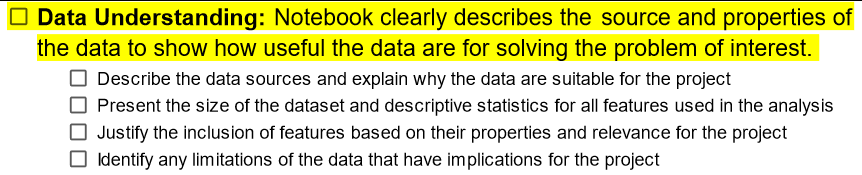

Ver el dataframe, ver el shape, ver el describe (para ver las estadisticas de cada feature)

#### 3.5.1.1 Looking at the dataset

#### 3.5.1.2 Looking at the data types

#### 3.5.1.3 Null values

### 3.5.2 Descriptive Analysis

#### 3.5.2.1 Univaried Analysis

**Numerical Columns**

**Categorical Columns**

### 3.5.2.2. Multivaried Analysis

**Contingency Tables**

# 4. Data Preparation

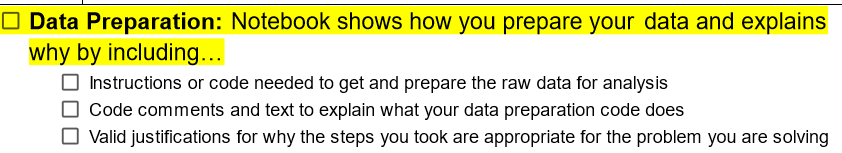

## 4.1 

# 5. Modelling

# 6. Evaluation

In [3]:
import pandas as pd

try:
    data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')
except UnicodeDecodeError:
    data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
    
data.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product
